In [2]:
import tensorflow as tf

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = r'/content/drive/My Drive/Deep learning ann/Churn_Modelling.csv'


In [5]:
print(tf.__version__)

2.18.0


In [6]:
#import some basic libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv(file_path)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# Divide the datset into independent and dependent features
X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [9]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [10]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [11]:
# Feature Engineering
geaography =pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first = True)

In [12]:
# concatenate  these variables with dataframe
X = X.drop(['Geography','Gender'], axis=1)

In [13]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [14]:
X = pd.concat([X,geaography,gender], axis=1)

In [15]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [16]:
#Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [17]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
X_train.shape

(8000, 11)

In [19]:
## Part 2: Lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [20]:
#Lets initialize the ANN

classifier = Sequential()

In [21]:
#Adding the input layer
classifier.add(Dense(units = 11, activation = 'relu'))

In [22]:
#Adding the first hidden layer

classifier.add(Dense(units = 7, activation = 'relu'))

In [23]:
#Adding the second hidden layer

classifier.add(Dense(units = 6, activation = 'relu'))

In [24]:
# Adding th output layer

classifier.add(Dense(units= 1, activation = 'sigmoid'))

In [26]:
#Then we have to compile everything together

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )

#here we used adam as optimizer which takes a default learning rate, if we want to introduce out own learning rate then we can use the below cell code

In [25]:
#Learning rate(optional)
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [27]:
##Early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [28]:
#train the model

model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs =1000, callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8089 - loss: 0.5594 - val_accuracy: 0.7955 - val_loss: 0.4753
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7969 - loss: 0.4616 - val_accuracy: 0.7955 - val_loss: 0.4490
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7940 - loss: 0.4356 - val_accuracy: 0.7955 - val_loss: 0.4356
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8105 - loss: 0.4001 - val_accuracy: 0.7955 - val_loss: 0.4232
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7893 - loss: 0.4167 - val_accuracy: 0.7955 - val_loss: 0.4121
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8085 - loss: 0.3954 - val_accuracy: 0.8209 - val_loss: 0.4044
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8329 - loss: 0.3853 - val_accuracy: 0.8315 - val_loss: 0.3975
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8481 - loss: 0.3672 - 

In [29]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

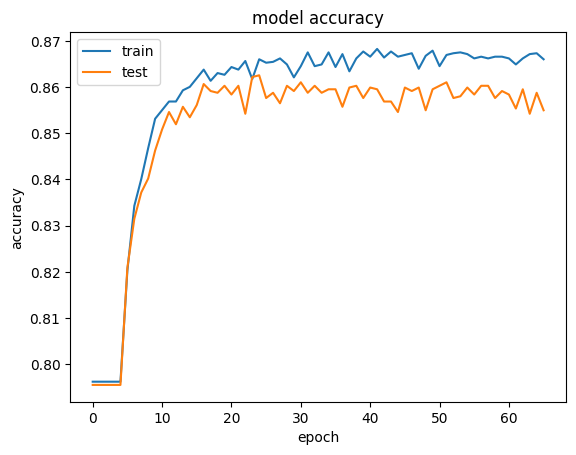

In [30]:
#summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

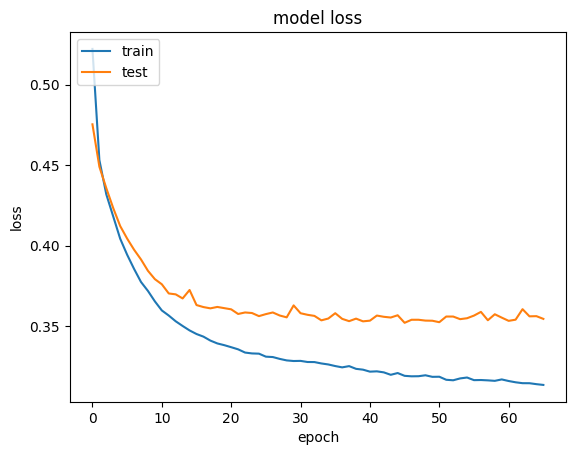

In [31]:
# accuracy for the loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [32]:
#Predictions for the test data
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [33]:
#create the confusion matrix

from sklearn.metrics import confusion_matrix
cm  = confusion_matrix(y_test, y_pred)
cm

array([[1492,  103],
       [ 176,  229]])

In [34]:
#calculate the accuracy

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.8605

In [35]:
## get the weights
classifier.get_weights()

[array([[ 1.18036844e-01, -3.49796921e-01,  8.87474567e-02,
          1.50007978e-01,  6.56848773e-02, -3.71590018e-01,
          5.69940954e-02, -3.43726352e-02,  3.29427928e-01,
          9.56715492e-04,  9.38910469e-02],
        [-7.92350173e-01,  6.58315480e-01,  1.22075140e+00,
          3.98663878e-01,  1.61575019e-01,  2.34256551e-01,
          4.16838199e-01,  2.26859078e-01, -7.97592029e-02,
         -4.35583353e-01,  7.79909715e-02],
        [ 1.07957408e-01, -9.91330072e-02, -9.95768309e-02,
          3.83725911e-01,  7.15674460e-02,  1.17450349e-01,
          2.87773639e-01, -2.60043684e-02, -2.24396884e-01,
         -8.92980173e-02,  6.10278770e-02],
        [-5.52193463e-01,  3.03382009e-01,  7.04356581e-02,
          3.57413054e-01, -9.12551403e-01, -2.68326968e-01,
         -5.66958189e-01, -1.62069909e-02, -4.31728780e-01,
         -1.96011052e-01, -3.10585290e-01],
        [-1.56562373e-01,  9.07570601e-01,  1.35597987e-02,
          1.01019442e-01, -1.06367254e+00,  

In [39]:
#predict for new value
new_prediction = classifier.predict(sc.transform(np.array([[0.0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [40]:
print(new_prediction)

[[0.]]
